In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Random Forests

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1QapDzOWucNFQoyui-rd4DWC-ExWMKzSh?usp=sharing)

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.95


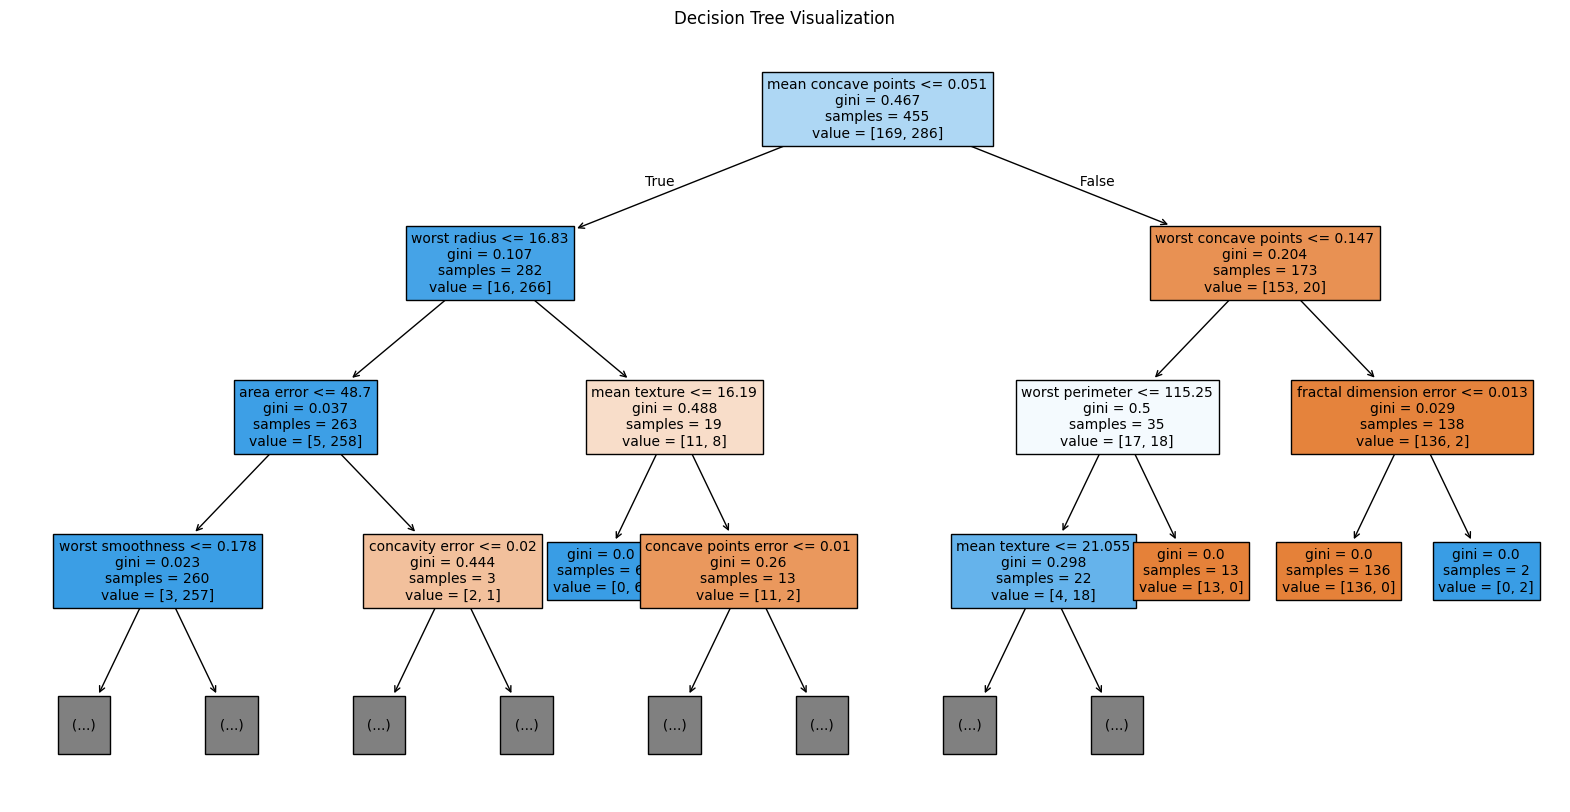

In [17]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)  # Adjust max_depth as needed
plt.title("Decision Tree Visualization")
plt.show()

In [21]:
indices_dt = np.argsort(dt_importances)[::-1]
sorted_features_dt = X.columns[indices_dt]
sorted_importances_dt = dt_importances[indices_dt]

fig = px.bar(x=sorted_importances_dt, y=sorted_features_dt, orientation='h', labels={'x': 'Importance', 'y': 'Features'},
             title="Sorted Decision Tree Feature Importances")
fig.update_layout(xaxis_tickformat='%', xaxis_title="Percentage")
fig.show()

In [18]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.96


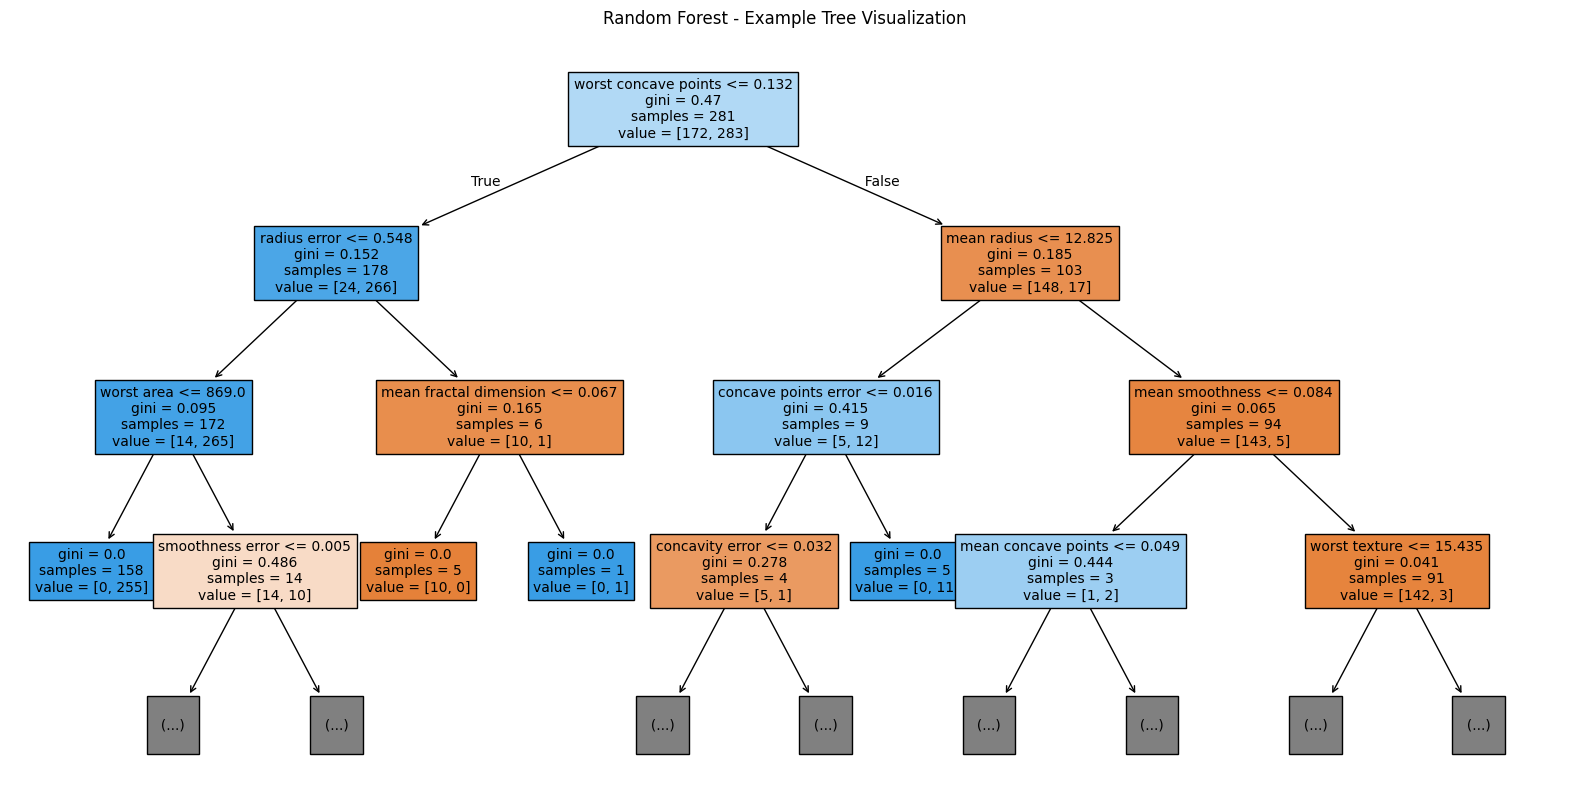

In [19]:
# Extracting one tree from the forest
single_tree_rf = rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(single_tree_rf, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)  # Adjust max_depth as needed
plt.title("Random Forest - Example Tree Visualization")
plt.show()

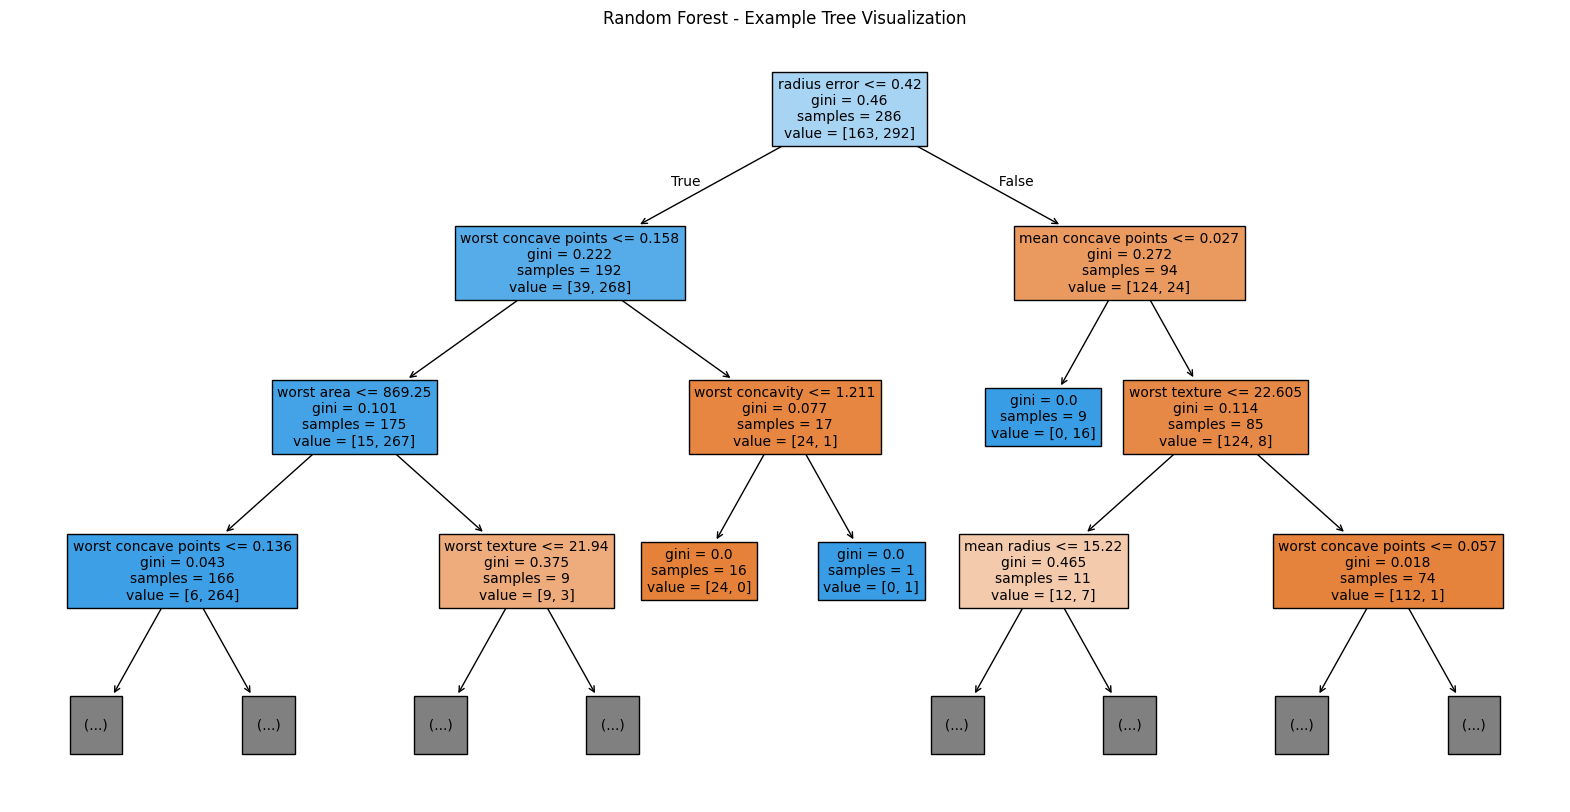

In [30]:
# Extracting another tree from the forest
single_tree_rf = rf.estimators_[1]

plt.figure(figsize=(20, 10))
plot_tree(single_tree_rf, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)  # Adjust max_depth as needed
plt.title("Random Forest - Example Tree Visualization")
plt.show()

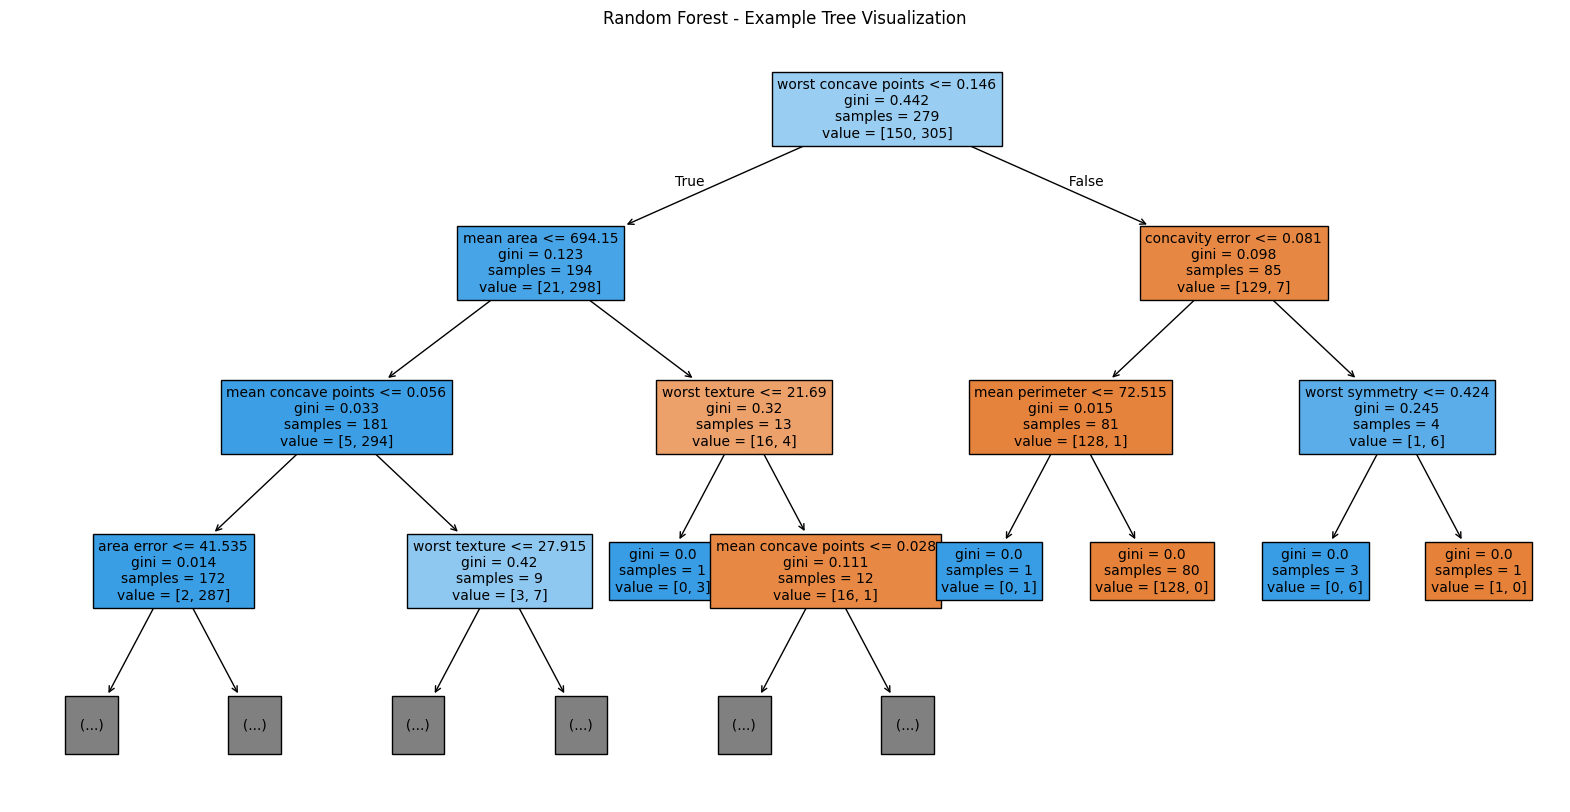

In [31]:
# Extracting another tree from the forest
single_tree_rf = rf.estimators_[2]

plt.figure(figsize=(20, 10))
plot_tree(single_tree_rf, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)  # Adjust max_depth as needed
plt.title("Random Forest - Example Tree Visualization")
plt.show()

In [22]:
indices_rf = np.argsort(rf_importances)[::-1]
sorted_features_rf = X.columns[indices_rf]
sorted_importances_rf = rf_importances[indices_rf]

fig = px.bar(x=sorted_importances_rf, y=sorted_features_rf, orientation='h', labels={'x': 'Importance', 'y': 'Features'},
             title="Sorted Random Forest Feature Importances")
fig.update_layout(xaxis_tickformat='%', xaxis_title="Percentage")
fig.show()

## Bagging vs. Random Forest

In [10]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print(f"Bagging Accuracy: {bagging_accuracy:.2f}")

Bagging Accuracy: 0.96


In [32]:
def plot_first_splits(model, title):
    features = []
    for estimator in model.estimators_:
        # The first split feature index
        features.append(X_train.columns[estimator.tree_.feature[0]])

    # Count the occurrences of each feature
    feature_counts = pd.Series(features).value_counts().sort_values(ascending=True)

    # Plot
    plt.figure(figsize=(10, 6))
    feature_counts.plot(kind='barh')
    plt.title(title)
    plt.xlabel('Number of Trees')
    plt.ylabel('Feature')
    plt.show()

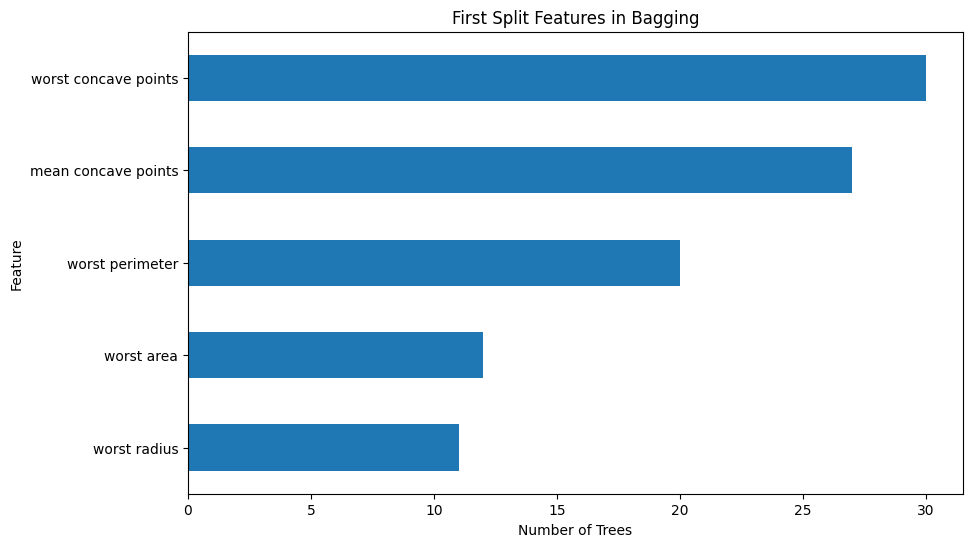

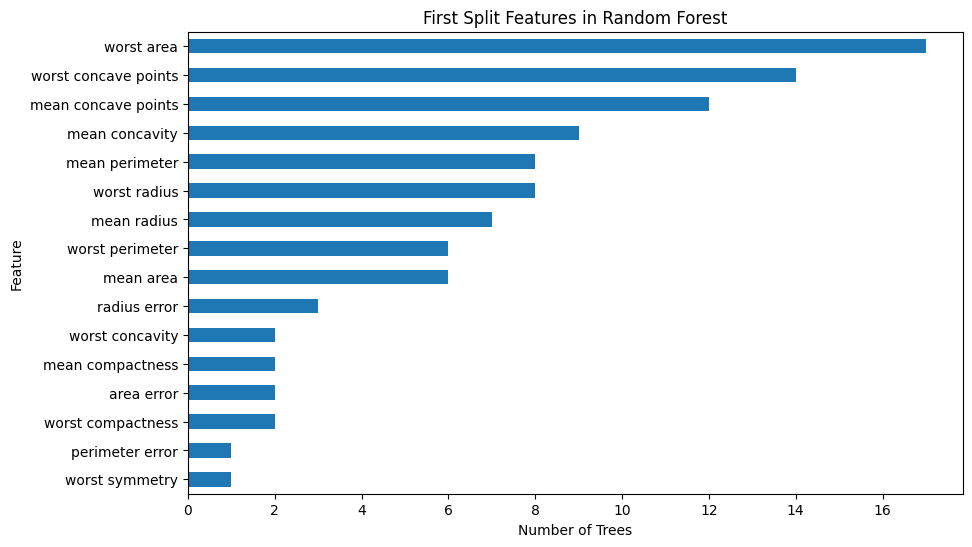

In [35]:
# Visualizing the first splits for both models
plot_first_splits(bagging, 'First Split Features in Bagging')
plot_first_splits(rf, 'First Split Features in Random Forest')

# GridSearch

In [11]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [28]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print(f"Best Random Forest Accuracy: {best_rf_accuracy:.2f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Best Random Forest Accuracy: 0.96


In [29]:
# Plot the feature importances of the tuned Random Forest
best_rf_importances = best_rf.feature_importances_
indices_rf = np.argsort(best_rf_importances)[::-1]
sorted_features_rf = X.columns[indices_rf]
sorted_importances_rf = best_rf_importances[indices_rf]

fig = px.bar(x=sorted_importances_rf, y=X.columns, orientation='h', labels={'x': 'Importance', 'y': 'Features'},
             title="Tuned Random Forest Feature Importances")
fig.update_layout(xaxis_tickformat='%', xaxis_title="Percentage")
fig.show()